In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
len(X_train)

60000

In [31]:
len(X_test)

10000

In [32]:
X_train[0].shape

(28, 28)

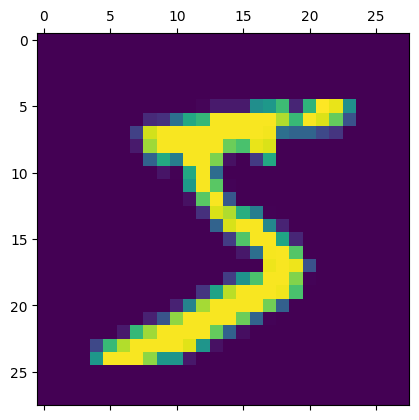

In [33]:
plt.matshow(X_train[0])

In [34]:
y_train[0]

5

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

Using Flatten layer so that we don't have to call .reshape on input dataset

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/fit", histogram_freq=0)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7082 - loss: 1.0795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9010 - loss: 0.3545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9186 - loss: 0.2934
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9264 - loss: 0.2600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9323 - loss: 0.2411


In [44]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 21656), started 0:16:35 ago. (Use '!kill 21656' to kill it.)


Either run above inline magic or go to git bash or your command prompt and type below to run it, tensorboard --logdir logs/ This will launch tensorboard at this url which you can open in your browser http://localhost:6006/

In [40]:

model.get_weights()

[array([[-6.0639992e-02, -5.3761184e-02,  3.4395434e-02, ...,
         -5.6940585e-02, -6.7957073e-02, -4.6758082e-02],
        [-5.5188328e-02,  3.0952536e-02, -6.1406136e-02, ...,
         -1.2833096e-02, -2.5549896e-02, -4.7781542e-03],
        [-4.0116757e-03, -7.7999197e-02, -6.9146290e-02, ...,
         -2.3573831e-02, -1.7883867e-02, -1.2700982e-02],
        ...,
        [ 3.3094078e-02, -2.5070116e-02, -3.2571305e-02, ...,
         -4.5793947e-02, -3.7037876e-02, -7.8267217e-02],
        [-4.2266369e-02,  5.2957088e-03, -3.6276877e-05, ...,
          1.5721045e-02, -2.3445666e-02,  7.9281002e-02],
        [ 4.3595165e-02,  1.4911830e-02,  3.5264991e-02, ...,
          5.1850319e-02, -5.9228979e-02, -2.8657541e-03]], dtype=float32),
 array([ 0.04610821, -0.00071276,  0.13753714,  0.04338594,  0.02298414,
        -0.01848115,  0.05991838,  0.06576505, -0.00324102, -0.01439821,
        -0.02911006, -0.02754826,  0.0008787 ,  0.0260392 ,  0.02449569,
         0.06515457, -0.0049745